##  We’re all going to die man!  Modeling the transmission of a zombie apocalypse with the SIR model for spread of infectious disease.

Daisy Perez-Ruiz

Jason Phennicie

## Table of Contents

* [Introduction](#ex0)
* [Model](#ex1)
* [Numerical Methods](#ex2)
* [Results](#ex3)
* [Analysis](#ex4)
* [Summary](#ex5)
* [References](#ex6)

## Introduction <a id='ex0'></a>


The spread of infectious diseases can be modelled using sets of ordinary differential equations, or ODEs. The ODE functions come from the SIR model for infectious disease, and have been modified slightly to account for the combined number of dead humans and zombies. The ODEs utilize parameters such as the infection rate, zombie death rate, initial population sizes, etc, to calculate the spread of the infection. We are also working on a way to implement more parameters such as speed of zombie and transmission rate that can be conditionally called. These will be modifiers on variables of change, for example dS would be modified by a transmission rate constant. 

An ODE solver was used to solve these differential equations, generating graphs to display how the human race did given a specific set of parameters. The boundary for this set of functions is either zombies or humans wipe the other out. 

## Model<a id='ex1'></a>
The SIR model for infectious disease is represented by the following ODEs. [TODO- ADD CITATION]

\begin{equation*}    
S'(t) = h - β*S*Z - ΔS*S \tag {1}
\end{equation*}

\begin{equation*}    
I'(t) = β*S*Z - ρ*I - Δ(I)*I \tag {2}
\end{equation*}

\begin{equation*}    
Z'(t) = ρ*I -  α*S*Z \tag {3}
\end{equation*}

\begin{equation*}    
D'(t) = ΔS*S + ΔI*I + α*S*Z \tag {4}
\end{equation*}
          
    
The first equation represents the number of humans who are susceptible to infection by the zombie virus. The variable h represents the original number of non-infected humans in the system. The β*S*z factor calculates the number of humans that have been infected with the zombie virus. ΔS*S calculates the change in the susceptible population as a result of human death.

The second equation calculates the number of humans who are infected with the zombie virus. This population depends on the changes to the susceptible population.

Equation three finds the number of zombies created from the susceptible population from equation two. This function takes in to account the 

Finally, equation four is made to calculate the total number of dead humans and zombies.

The SIR model also typically includes an additional differential equation, R'(t), that represents the recovered population. Unfortunately due to the nature of a zombie apocalypse there will be no recovery. The recovery equation has been replaced by the death toll, D'(t).




A master list of variables for the above differential equations:

S is susceptible population.

I is infected population.

h is number of humans.

Z is number of zombies.

α is zombie death rate.

β is susceptible infection rate.

ρ is time to change to a zombie after infection.

D is dead population.

## Numerical Methods<a id='ex2'></a>

The fourth order Runge-Kutte ODE solver was used to solve the ODEs in the SIR model. This method of solving the SIR model is both very accurate and simple to use.

In [1]:
import numpy as np
import pylab as plt


def solve(f,y0,interval,steps,order):
    """ Solve ODE by Euler or Runge-Kutta methods, with fixed number
    of steps.

    In contrast to the examples of Newman Chapter 8, which build up a
    list, point by point, 
    
    f: function giving ODE as y'=f(x,y)
    y0: initial value
    interval: tuple region (a,b) on which to solve ODE
    steps: number of steps
    order: order of solution method (1 for Euler, 2 or 4 for Runge-Kutta)
    
    Returns (x,y) points, as (steps+1)x2 numpy array.
    """
    (a,b)=interval
    temp = 0
    h=(b - a) / float(steps)
    x=y0
    tpoints= np.arange(a, b, h)
    spoints = []
    ipoints = []
    zpoints = []
    dpoints = []
    
    if (order== 1):
        #Using Euler's method
        for t in (tpoints):
            xpoints.append(x)
            x += h * f(x, t)
        func = (tpoints, xpoints)
    if (order == 2):
        for t in (tpoints):
            xpoints.append(x)
            k1 = h* f(x,t)
            k2 = h* f(x+0.5*k1, t+0.5*h)
            x+= k2
        func = (tpoints, xpoints)
    if (order == 4):
        for t in tpoints:
            spoints.append(x[0])
            ipoints.append(x[1])
            zpoints.append(x[2])
            dpoints.append(x[3])
            k1 = h*f(x,t)
            k2 = h*f(x+0.5*k1,t+0.5*h)
            k3 = h*f(x+0.5*k2,t+0.5*h)
            k4 = h*f(x+k3,t+h)
            x += (k1+2*k2+2*k3+k4)/6
        plt.figure()
        plt.plot(tpoints, spoints, color='b', label='Living')
        plt.plot(tpoints, ipoints, color='r', label='Infected')
        plt.plot(tpoints, zpoints, color='g', label='Zombies')
        plt.plot(tpoints, dpoints, color='k', label='Dead')
    return ()


()

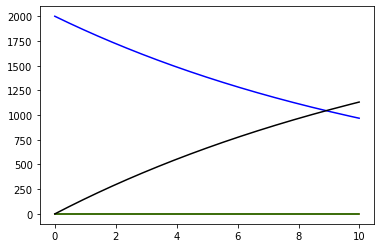

In [5]:
#declare range
interval= [0,10]
steps= 1000

h=10          #rate at which people coming into the area/birth rate
d= 0.08      #death rate
beta= 1   #transmission rate
ro = 1     #percent of those who are infected become zombies
alpha= 0


def f(y, t, *args):
    #initialize
    Si=y[0]
    Ii=y[1]
    Zi=y[2]
    Di=y[3]

    f0= h - beta*Si*Zi - d*Si 
    f1= beta*Si*Zi - ro*Ii - d*Ii
    f2= ro*Ii - alpha*Si*Zi
    f3= d*Si + d*Ii + alpha*Si*Zi
    
    return np.array([f0, f1, f2, f3], float)

#initial conditions
S0 = 2000.    #initial Population
I0=0.         #Initial infected population
Z0=0.         #initial zombie population
D0=0.         #Initial deaths

y0=[S0, I0, Z0, D0]

solve(f, y0, interval, steps, order=4)
#S= solution[:, 0]
#I= solution[:, 1]
#Z= solution[:, 2]
#D= solution[:, 3]

#plt.figure()
#plt.plot(S, label='Living')
#plt.plot(Z, label='Zombies')


## Results<a id='ex3'></a>


## Analysis <a id='ex4'></a>


## Summary <a id='ex5'></a>


## References <a id='ex6'></a>



[1] http://www.bbc.com/culture/story/20150828-where-do-zombies-come-from"

[2] https://www.maa.org/press/periodicals/loci/joma/the-sir-model-for-spread-of-disease-the-differential-equation-model

[3] http://www-personal.umich.edu/~mejn/cp/ 

[4] https://arxiv.org/pdf/1802.10443.pdf 

[5] https://www.history.com/topics/folklore/history-of-zombies
